# CartPole Gym environment with TfAgents

##### suppress package warnings, prepare matlab, if in colab: load additional packages for rendering

In [ ]:
import sys
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

if 'google.colab' in sys.modules:
    !apt-get install xvfb >/dev/null
    !pip install pyvirtualdisplay >/dev/null    
    
    from pyvirtualdisplay import Display
    Display(visible=0, size=(960, 720)).start()    

In [ ]:
# only for local installation
sys.path.append('..')

## Install packages (gym, tfagents, tensorflow,....)

In [ ]:
!pip install easyagents >/dev/null

## Dry Run (very short training)

In [1]:
from easyagents.agents import PpoAgent, RandomAgent
from easyagents.callbacks import log, plot, duration

c:\dev\github\easyagents\env\lib\site-packages\gym\logger.py:30: UserWarning: WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))



  TensorFlow's `tf-nightly` package will soon be updated to TensorFlow 2.0.

  Please upgrade your code to TensorFlow 2.0:
    * https://www.tensorflow.org/beta/guide/migration_guide

  Or install the latest stable TensorFlow 1.X release:
    * `pip install -U "tensorflow==1.*"`

  Otherwise your code may be broken by the change.

  




Let's do a quick test and train for a few iterations using a default network architecture (2 layers, fully connected, 100 neurons each):

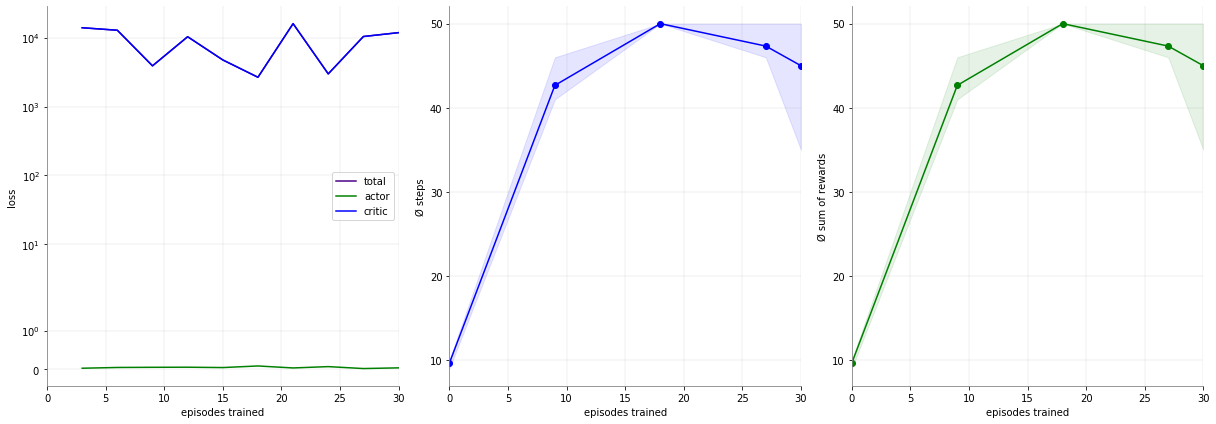

In [2]:
ppoAgent = PpoAgent('CartPole-v0')
ppoAgent.train(duration.Fast())

Note that rewards and step count are equal. That's because the CartPole environment doles out 1 reward point for 
each successful step, and stops after the first failed step.

'duration.Fast()' configures the training length to 10 iterations with 10 episodes each. 
After every iteration the current policy is retrained. The resulting loss is depicted in the first plot.
Since Ppo is an actor-critic algorithm we not only plot the total loss but also the loss for the actor- and
critic-networks separately.

In the "steps" and "sum of rewards" plots we see the result of the evaluation.
The coloured area represents the max and min values encoutered for the current evaluation period.


## Train (plot state, custom network)

In [ ]:
%%time

ppoAgent = PpoAgent('CartPole-v0', fc_layers=(100, 50, 25))
ppoAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()], 
               num_iterations=10, num_iterations_between_eval=3)


The fc_layers argument defines the policy's neural network architecture. Here we use 3 fully connected layers
with 100 neurons in the first, 50 in the second and 25 in the final layer. 
By default fc_layers=(75,75) is used.

The first argument of the train method is a list of callbacks. Through callbacks we define the plots generated during training, the logging behaviour or control training duration. By passing [plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()] we add in particular the State() plot, depicting the last observation state of the last evaluation episode. plot.Actions() displays a histogram of the actions taken for each episode played during the last evaluation period. 

Besides num_iterations there are quite a few parameters to specify the exact training duration (e.g. num_episodes_per_iteration, num_epochs_per_iteration, max_steps_per_episode,...).

## Switching the algorithm

Switching from Ppo to Dqn is easy, essentially just replace PpoAgent with DqnAgent (the evaluation may take a few
minuites):

TypeError: Tensor is unhashable if Tensor equality is enabled. Instead, use tensor.experimental_ref() as the key.

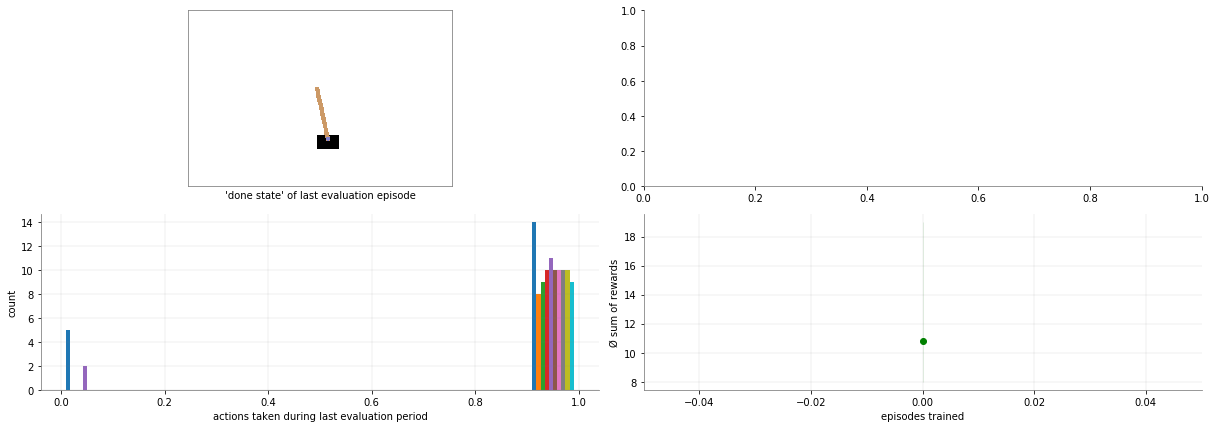

In [3]:
%%time

from easyagents.agents import DqnAgent
from easyagents.callbacks import plot

dqnAgent = DqnAgent('CartPole-v0', fc_layers=(100, ))
dqnAgent.train([plot.State(), plot.Loss(), plot.Actions(), plot.Rewards()], 
               num_iterations=20000, num_iterations_between_eval=1000)

Since Dqn by default only takes 1 step per iteration (and thus an episode spans over several iterations) we increased
the num_iterations parameter.

## Next: Custom training (playing, mp4, logging)

* see [Orso on colab](https://colab.research.google.com/github/christianhidber/easyagents/blob/master/jupyter_notebooks/easyagents_orso.ipynb)
  (an example of a gym environment implementation based on a routing problem)

